In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),"apperception"))

### IMPORTS
import cv2

from scenic_world import *
from world_executor import *
from video_util import *
from metadata_util import *
import lens
import point



In [5]:
### Let's define some attribute for constructing the world first
name = 'ScenicWorld' # world name
units = 'metrics'      # world units
cam_id = 'CAM_FRONT'
video_file = os.path.join("samples",cam_id,"n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151603512404.jpg") #example video file, using image file for now
user_data_dir = os.path.join("v1.0-mini")
lens_attrs = {'fov': 120, 
              'cam_origin': (0, 0, 0), 
              'skew_factor': 0}
point_attrs = {'p_id': 'p1', 
               'cam_id': 'cam1', 
               'x': 0,
               'y': 0, 
               'z': 0,
               'time': None, 
               'type':'pos'}
camera_attrs = {'ratio': 0.5}
fps = 30


In [7]:
scenic_world = ScenicWorld(name=name, units=units)

In [8]:
### Ingest the camera to the world
scenic_world = scenic_world.scenic_camera(cam_id=cam_id,  
                               video_file=video_file, 
                               metadata_identifier=name+"_"+cam_id)

In [9]:
### Call execute on the world to run the detection algorithm and save the real data to the database
recognized_scenic_world = scenic_world.recognize(cam_id, scenic_data_dir=user_data_dir)
recognized_scenic_world.execute()

Worlds Table created successfully........
New world inserted successfully........
Camera Table created successfully........
already exists


{'cam1': <video_context.Camera object at 0x7f6468802cf8>}
Module(body=[Return(value=Compare(left=Attribute(value=Name(id='obj', ctx=Load()), attr='object_type', ctx=Load()), ops=[Eq()], comparators=[Str(s='car')]))])
Module(body=[Return(value=Compare(left=Attribute(value=Name(id='obj', ctx=Load()), attr='location', ctx=Load()), ops=[In()], comparators=[Name(id='volume', ctx=Load())]))])
Module(body=[Return(value=Compare(left=Call(func=Name(id='Tmin', ctx=Load()), args=[Attribute(value=Name(id='obj', ctx=Load()), attr='location', ctx=Load())], keywords=[]), ops=[GtE()], comparators=[Name(id='start', ctx=Load())]))])
Module(body=[Return(value=Compare(left=Call(func=Name(id='Tmax', ctx=Load()), args=[Attribute(value=Name(id='obj', ctx=Load()), attr='location', ctx=Load())], keywords=[]), ops=[Lt()], comparators=[Name(id='end', ctx=Load())]))])
Worlds Table created successfully........
New world inserted successfully........
Camera Table created successfully........
New camera inserted suc

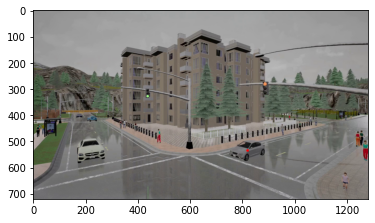

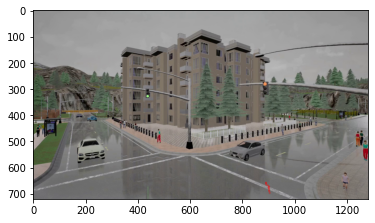

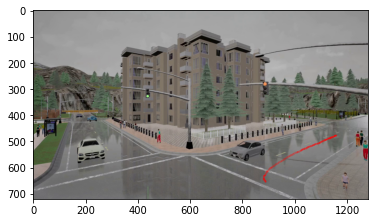

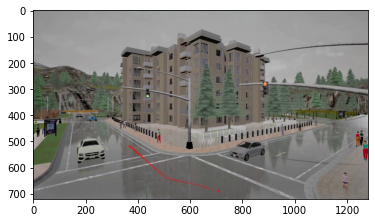

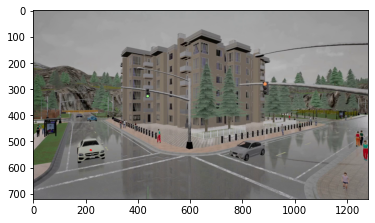

Module(body=[Return(value=Compare(left=Attribute(value=Name(id='obj', ctx=Load()), attr='object_id', ctx=Load()), ops=[In()], comparators=[Name(id='id_array', ctx=Load())]))])
Worlds Table created successfully........
New world inserted successfully........
Camera Table created successfully........
New camera inserted successfully.........
Module(body=[Return(value=Compare(left=Call(func=Name(id='Tmin', ctx=Load()), args=[Attribute(value=Name(id='obj', ctx=Load()), attr='location', ctx=Load())], keywords=[]), ops=[GtE()], comparators=[Name(id='start', ctx=Load())]))])
Module(body=[Return(value=Compare(left=Call(func=Name(id='Tmax', ctx=Load()), args=[Attribute(value=Name(id='obj', ctx=Load()), attr='location', ctx=Load())], keywords=[]), ops=[Lt()], comparators=[Name(id='end', ctx=Load())]))])
Xmin(General_Bbox.trajBbox)
Ymin(General_Bbox.trajBbox)
Zmin(General_Bbox.trajBbox)
Xmax(General_Bbox.trajBbox)
Ymax(General_Bbox.trajBbox)
Zmax(General_Bbox.trajBbox)
Tmin(General_Bbox.trajBbox)

In [7]:
### Example Test Query
filtered_world = scenic_world.predicate(lambda obj:obj.object_type == "car")
filtered_world.get_trajectory().execute()